In [121]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = (10,8)

## Exploratory Data Analysis

In [122]:
df_health = pd.read_csv("mental-health-twitter.csv",)

df_health

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0


<AxesSubplot:xlabel='label', ylabel='friends'>

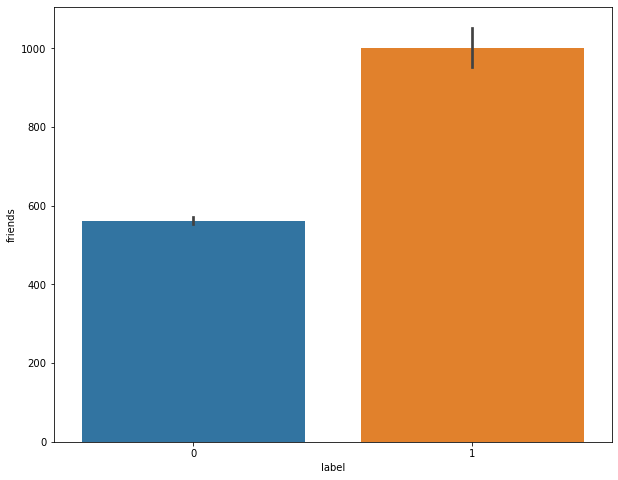

In [4]:
sns.barplot(y='friends',x='label',data=df_health)

People with more friends tend to be depressed more, well that is unexpected

<AxesSubplot:xlabel='label', ylabel='followers'>

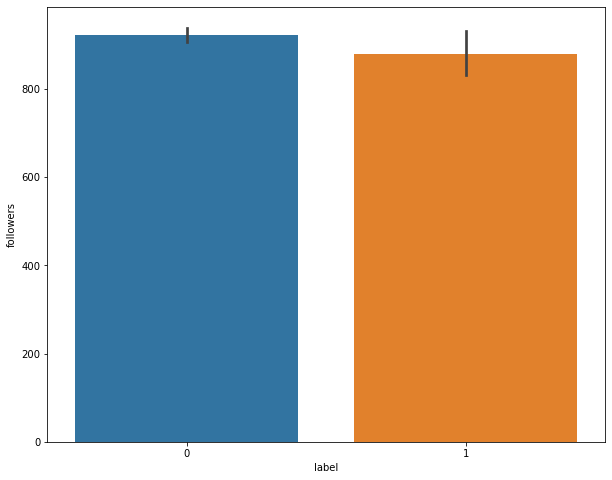

In [6]:
sns.barplot(y='followers',x='label',data=df_health)

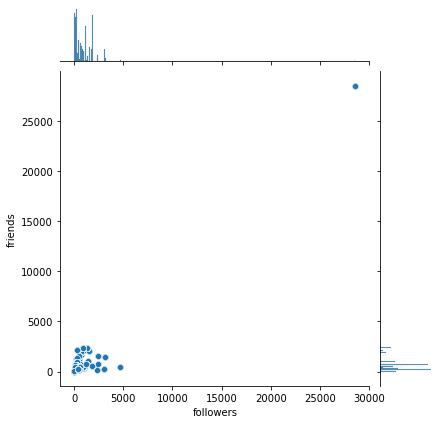

In [8]:
sns.jointplot('followers','friends',data=df_health)

As expected people with less followers have less friends

In [9]:
df_health.isna().sum()

Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

In [10]:
df_health.retweets.unique() #not categorical

array([    0,     1,     2, ...,  3137,   346, 52249], dtype=int64)

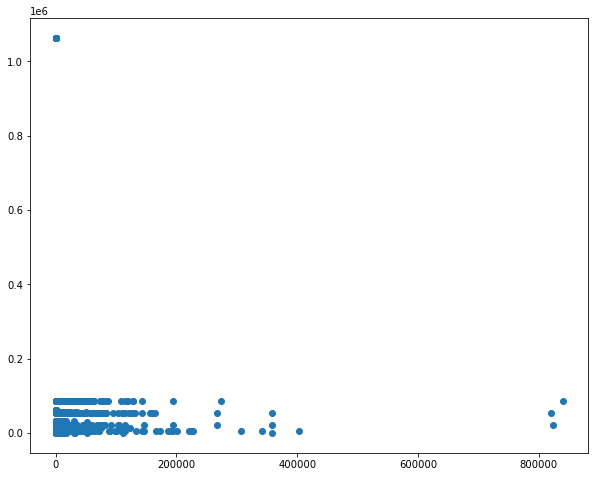

In [17]:
plt.scatter(data=df_health, x='retweets', y='statuses')

<AxesSubplot:>

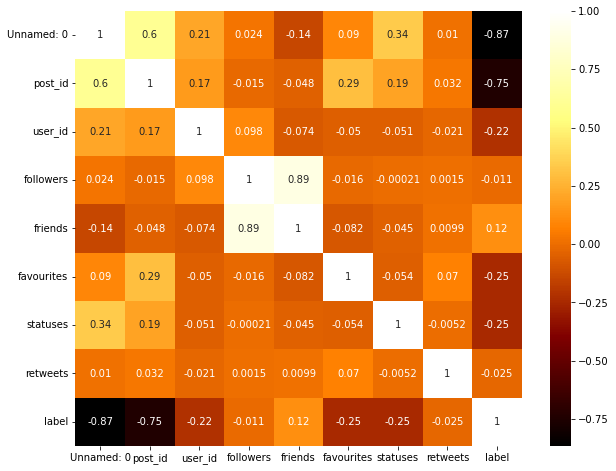

In [18]:
sns.heatmap(df_health.corr(),annot=True,cmap=plt.cm.afmhot)

friends and followers are very similar, but followers gives less info to predict label

## Feature Engineering

In [19]:
df_health

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0


In [23]:
df_health.columns

Index(['Unnamed: 0', 'post_id', 'post_created', 'post_text', 'user_id',
       'followers', 'friends', 'favourites', 'statuses', 'retweets', 'label'],
      dtype='object')

In [123]:
df_health.drop(columns=['post_id','Unnamed: 0'],inplace=True)
df_health.set_index('user_id',inplace=True)

In [124]:
df_health['post_created'] = pd.to_datetime(df_health['post_created'],infer_datetime_format=True)
df_health['weekday'] = df_health['post_created'].dt.weekday 
df_health['month'] = df_health['post_created'].dt.month
df_health['day'] = df_health['post_created'].dt.day
df_health['year'] = df_health['post_created'].dt.year

In [15]:
df_health

,post_created,post_text,followers,friends,favourites,statuses,retweets,label,weekday,month,day,year
user_id,,,,,,,,,,,,
1013187241,2015-08-30 07:48:37+00:00,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1,6,8,30,2015
1013187241,2015-08-30 07:31:33+00:00,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1,6,8,30,2015
1013187241,2015-08-29 22:11:07+00:00,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1,5,8,29,2015
1013187241,2015-08-29 18:40:49+00:00,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1,5,8,29,2015
1013187241,2015-08-29 18:40:26+00:00,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1,5,8,29,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1169875706,2017-01-12 00:14:56+00:00,A day without sunshine is like night.,442,230,7,1063601,0,0,3,1,12,2017
1169875706,2017-01-12 00:06:18+00:00,"Boren's Laws: (1) When in charge, ponder. (2) ...",442,230,7,1063601,0,0,3,1,12,2017
1169875706,2017-01-12 00:05:42+00:00,The flow chart is a most thoroughly oversold p...,442,230,7,1063601,0,0,3,1,12,2017


In [125]:
df_health.reset_index(inplace=True)

In [126]:
df_health.drop(columns='post_created',inplace=True)

<AxesSubplot:xlabel='year'>

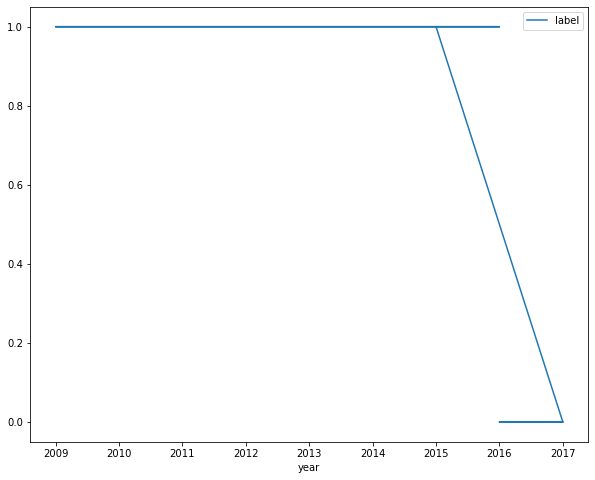

In [17]:
df_health[['year','label']].set_index('year').plot()

understanding from this : as time passes mental health awareness increases and is treated more hence the decline

In [55]:
df_health

,post_created,post_text,followers,friends,favourites,statuses,retweets,label
user_id,,,,,,,,
1013187241,2015-08-30 07:48:37+00:00,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1
1013187241,2015-08-30 07:31:33+00:00,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1
1013187241,2015-08-29 22:11:07+00:00,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1
1013187241,2015-08-29 18:40:49+00:00,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1
1013187241,2015-08-29 18:40:26+00:00,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...
1169875706,2017-01-12 00:14:56+00:00,A day without sunshine is like night.,442,230,7,1063601,0,0
1169875706,2017-01-12 00:06:18+00:00,"Boren's Laws: (1) When in charge, ponder. (2) ...",442,230,7,1063601,0,0
1169875706,2017-01-12 00:05:42+00:00,The flow chart is a most thoroughly oversold p...,442,230,7,1063601,0,0


In [65]:
# paragraph = ' '.join(df_health['post_text'])
# paragraph

In [15]:
pattern = re.compile(r'https?://t.co/[a-zA-Z0-9]+')

# matches = pattern.findall(paragraph)
# matches

['http://t.co/mC8Ive72zR ',
 'http://t.co/CFBKrRvJIs',
 'http://t.co/70ujlTCKlBMoving ',
 'http://t.co/foAexmvoidSuch ',
 'https://t.co/GgaVEkymp7RT ',
 'https://t.co/1S0L7ZAqjrHad ',
 'http://t.co/0CGzPXJLrP ',
 'http://t.co/5xa87FWND4 ',
 'http://t.co/sya7RRr2Fa ',
 'http://t.co/AgJ2tx5f93Truly ',
 'https://t.co/jI4Lw4K8coI ',
 'http://t.co/XvuLGzu73QRT ',
 'http://t.co/F7MVaZdBis ',
 'http://t.co/HaKwgTO1fONot ',
 'http://t.co/nEqzTNqVjJ ',
 'http://t.co/WrjBKlcVvoIt ',
 'https://t.co/wdZELWA3ahLazy ',
 'http://t.co/dtJkxu7O3J ',
 'http://t.co/hDrCAJ10c9I',
 'http://t.co/EMSga5PBF3 ',
 'http://t.co/tiyZ',
 'http://t.co/P7NroQNpgi ',
 'http://t.co/lfLO',
 'https://t.co/6whLQe3pk8',
 'https://t.co/gG0rUMNvmmRT ',
 'http://t.co/iSmQGJY1eB',
 'http://t.co/aG2sWz',
 'https://t.co/fKRqw7XRHPSo ',
 'http://t.co/OC0WW3jUQBSofa ',
 'http://t.co/iZfy86TPbG',
 'http://t.co/4vIAhxYS6g',
 'http://t.co/QE0',
 'http://t.co/lmcWqeKIpp ',
 'http://t.co/BDeyNVm5BDFeeling ',
 'https://t.co/8La9quYnv2I

In [128]:
#paragraph = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", paragraph)

for num,row in enumerate(df_health['post_text']):
    row = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", row)
    row = nltk.sent_tokenize(row)
    df_health['post_text'][num] = row

In [79]:
"""split data into multiple sentences"""

# sentences = nltk.sent_tokenize(paragraph)

# for num,row in enumerate(df_health['post_text']):
#     row = nltk.sent_tokenize(row)
#     df_health['post_text'][num] = row

# sentences

In [129]:
df_health['positive_emoji'] = 0
df_health['neutral_emoji'] = 0
df_health['negative_emoji'] = 0


positive_emoji = ['❤️','❤','😍','♥️','😊','💕','👍','😂','🙌','🤑','💖','✨','😊','🎉','💞',
                  '😝','😈','😃','😁','😎','😘','💓','😉','😬','😄','😀','😜','💗','😌','😆',
                  '😛','😻','🙋','❣️','🙂','😇','💝','😏','😋','🤗','🙆','🤓','😚','😙','😸','😼','😺','😽']


neutral_emoji = ['🙏','💜','💙','👽','💛','💟','💚','😅','🙃','💩','😳','🙄','😑','🙇','🙎','😐','😶']


negative_emoji = ['💥','💘','😭','😱','👎','😫','😨','😢','💀','🤔','👻','😓','💦','😤','😩','😴','💔',
                  '😒','😪','😈','😣','😮','😡','😕','😔','😠','😷','😥','😞','😲','😰','🙀','😖','😧',
                  '😟','😹','😵','😶','😯','🤒','🤕','😾','💤']

In [130]:
emoji_rx = r"[#*0-9]\uFE0F?\u20E3|©\uFE0F?|[®\u203C\u2049\u2122\u2139\u2194-\u2199\u21A9\u21AA]\uFE0F?|[\u231A\u231B]|[\u2328\u23CF]\uFE0F?|[\u23E9-\u23EC]|[\u23ED-\u23EF]\uFE0F?|\u23F0|[\u23F1\u23F2]\uFE0F?|\u23F3|[\u23F8-\u23FA\u24C2\u25AA\u25AB\u25B6\u25C0\u25FB\u25FC]\uFE0F?|[\u25FD\u25FE]|[\u2600-\u2604\u260E\u2611]\uFE0F?|[\u2614\u2615]|\u2618\uFE0F?|\u261D[\uFE0F\U0001F3FB-\U0001F3FF]?|[\u2620\u2622\u2623\u2626\u262A\u262E\u262F\u2638-\u263A\u2640\u2642]\uFE0F?|[\u2648-\u2653]|[\u265F\u2660\u2663\u2665\u2666\u2668\u267B\u267E]\uFE0F?|\u267F|\u2692\uFE0F?|\u2693|[\u2694-\u2697\u2699\u269B\u269C\u26A0]\uFE0F?|\u26A1|\u26A7\uFE0F?|[\u26AA\u26AB]|[\u26B0\u26B1]\uFE0F?|[\u26BD\u26BE\u26C4\u26C5]|\u26C8\uFE0F?|\u26CE|[\u26CF\u26D1\u26D3]\uFE0F?|\u26D4|\u26E9\uFE0F?|\u26EA|[\u26F0\u26F1]\uFE0F?|[\u26F2\u26F3]|\u26F4\uFE0F?|\u26F5|[\u26F7\u26F8]\uFE0F?|\u26F9(?:\u200D[\u2640\u2642]\uFE0F?|[\uFE0F\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\u26FA\u26FD]|\u2702\uFE0F?|\u2705|[\u2708\u2709]\uFE0F?|[\u270A\u270B][\U0001F3FB-\U0001F3FF]?|[\u270C\u270D][\uFE0F\U0001F3FB-\U0001F3FF]?|\u270F\uFE0F?|[\u2712\u2714\u2716\u271D\u2721]\uFE0F?|\u2728|[\u2733\u2734\u2744\u2747]\uFE0F?|[\u274C\u274E\u2753-\u2755\u2757]|\u2763\uFE0F?|\u2764(?:\u200D[\U0001F525\U0001FA79]|\uFE0F(?:\u200D[\U0001F525\U0001FA79])?)?|[\u2795-\u2797]|\u27A1\uFE0F?|[\u27B0\u27BF]|[\u2934\u2935\u2B05-\u2B07]\uFE0F?|[\u2B1B\u2B1C\u2B50\u2B55]|[\u3030\u303D\u3297\u3299]\uFE0F?|[\U0001F004\U0001F0CF]|[\U0001F170\U0001F171\U0001F17E\U0001F17F]\uFE0F?|[\U0001F18E\U0001F191-\U0001F19A]|\U0001F1E6[\U0001F1E8-\U0001F1EC\U0001F1EE\U0001F1F1\U0001F1F2\U0001F1F4\U0001F1F6-\U0001F1FA\U0001F1FC\U0001F1FD\U0001F1FF]|\U0001F1E7[\U0001F1E6\U0001F1E7\U0001F1E9-\U0001F1EF\U0001F1F1-\U0001F1F4\U0001F1F6-\U0001F1F9\U0001F1FB\U0001F1FC\U0001F1FE\U0001F1FF]|\U0001F1E8[\U0001F1E6\U0001F1E8\U0001F1E9\U0001F1EB-\U0001F1EE\U0001F1F0-\U0001F1F5\U0001F1F7\U0001F1FA-\U0001F1FF]|\U0001F1E9[\U0001F1EA\U0001F1EC\U0001F1EF\U0001F1F0\U0001F1F2\U0001F1F4\U0001F1FF]|\U0001F1EA[\U0001F1E6\U0001F1E8\U0001F1EA\U0001F1EC\U0001F1ED\U0001F1F7-\U0001F1FA]|\U0001F1EB[\U0001F1EE-\U0001F1F0\U0001F1F2\U0001F1F4\U0001F1F7]|\U0001F1EC[\U0001F1E6\U0001F1E7\U0001F1E9-\U0001F1EE\U0001F1F1-\U0001F1F3\U0001F1F5-\U0001F1FA\U0001F1FC\U0001F1FE]|\U0001F1ED[\U0001F1F0\U0001F1F2\U0001F1F3\U0001F1F7\U0001F1F9\U0001F1FA]|\U0001F1EE[\U0001F1E8-\U0001F1EA\U0001F1F1-\U0001F1F4\U0001F1F6-\U0001F1F9]|\U0001F1EF[\U0001F1EA\U0001F1F2\U0001F1F4\U0001F1F5]|\U0001F1F0[\U0001F1EA\U0001F1EC-\U0001F1EE\U0001F1F2\U0001F1F3\U0001F1F5\U0001F1F7\U0001F1FC\U0001F1FE\U0001F1FF]|\U0001F1F1[\U0001F1E6-\U0001F1E8\U0001F1EE\U0001F1F0\U0001F1F7-\U0001F1FB\U0001F1FE]|\U0001F1F2[\U0001F1E6\U0001F1E8-\U0001F1ED\U0001F1F0-\U0001F1FF]|\U0001F1F3[\U0001F1E6\U0001F1E8\U0001F1EA-\U0001F1EC\U0001F1EE\U0001F1F1\U0001F1F4\U0001F1F5\U0001F1F7\U0001F1FA\U0001F1FF]|\U0001F1F4\U0001F1F2|\U0001F1F5[\U0001F1E6\U0001F1EA-\U0001F1ED\U0001F1F0-\U0001F1F3\U0001F1F7-\U0001F1F9\U0001F1FC\U0001F1FE]|\U0001F1F6\U0001F1E6|\U0001F1F7[\U0001F1EA\U0001F1F4\U0001F1F8\U0001F1FA\U0001F1FC]|\U0001F1F8[\U0001F1E6-\U0001F1EA\U0001F1EC-\U0001F1F4\U0001F1F7-\U0001F1F9\U0001F1FB\U0001F1FD-\U0001F1FF]|\U0001F1F9[\U0001F1E6\U0001F1E8\U0001F1E9\U0001F1EB-\U0001F1ED\U0001F1EF-\U0001F1F4\U0001F1F7\U0001F1F9\U0001F1FB\U0001F1FC\U0001F1FF]|\U0001F1FA[\U0001F1E6\U0001F1EC\U0001F1F2\U0001F1F3\U0001F1F8\U0001F1FE\U0001F1FF]|\U0001F1FB[\U0001F1E6\U0001F1E8\U0001F1EA\U0001F1EC\U0001F1EE\U0001F1F3\U0001F1FA]|\U0001F1FC[\U0001F1EB\U0001F1F8]|\U0001F1FD\U0001F1F0|\U0001F1FE[\U0001F1EA\U0001F1F9]|\U0001F1FF[\U0001F1E6\U0001F1F2\U0001F1FC]|\U0001F201|\U0001F202\uFE0F?|[\U0001F21A\U0001F22F\U0001F232-\U0001F236]|\U0001F237\uFE0F?|[\U0001F238-\U0001F23A\U0001F250\U0001F251\U0001F300-\U0001F320]|[\U0001F321\U0001F324-\U0001F32C]\uFE0F?|[\U0001F32D-\U0001F335]|\U0001F336\uFE0F?|[\U0001F337-\U0001F37C]|\U0001F37D\uFE0F?|[\U0001F37E-\U0001F384]|\U0001F385[\U0001F3FB-\U0001F3FF]?|[\U0001F386-\U0001F393]|[\U0001F396\U0001F397\U0001F399-\U0001F39B\U0001F39E\U0001F39F]\uFE0F?|[\U0001F3A0-\U0001F3C1]|\U0001F3C2[\U0001F3FB-\U0001F3FF]?|[\U0001F3C3\U0001F3C4](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F3C5\U0001F3C6]|\U0001F3C7[\U0001F3FB-\U0001F3FF]?|[\U0001F3C8\U0001F3C9]|\U0001F3CA(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F3CB\U0001F3CC](?:\u200D[\u2640\u2642]\uFE0F?|[\uFE0F\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F3CD\U0001F3CE]\uFE0F?|[\U0001F3CF-\U0001F3D3]|[\U0001F3D4-\U0001F3DF]\uFE0F?|[\U0001F3E0-\U0001F3F0]|\U0001F3F3(?:\u200D(?:\u26A7\uFE0F?|\U0001F308)|\uFE0F(?:\u200D(?:\u26A7\uFE0F?|\U0001F308))?)?|\U0001F3F4(?:\u200D\u2620\uFE0F?|\U000E0067\U000E0062(?:\U000E0065\U000E006E\U000E0067|\U000E0073\U000E0063\U000E0074|\U000E0077\U000E006C\U000E0073)\U000E007F)?|[\U0001F3F5\U0001F3F7]\uFE0F?|[\U0001F3F8-\U0001F407]|\U0001F408(?:\u200D\u2B1B)?|[\U0001F409-\U0001F414]|\U0001F415(?:\u200D\U0001F9BA)?|[\U0001F416-\U0001F43A]|\U0001F43B(?:\u200D\u2744\uFE0F?)?|[\U0001F43C-\U0001F43E]|\U0001F43F\uFE0F?|\U0001F440|\U0001F441(?:\u200D\U0001F5E8\uFE0F?|\uFE0F(?:\u200D\U0001F5E8\uFE0F?)?)?|[\U0001F442\U0001F443][\U0001F3FB-\U0001F3FF]?|[\U0001F444\U0001F445]|[\U0001F446-\U0001F450][\U0001F3FB-\U0001F3FF]?|[\U0001F451-\U0001F465]|[\U0001F466\U0001F467][\U0001F3FB-\U0001F3FF]?|\U0001F468(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?\U0001F468|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED]|\U0001F466(?:\u200D\U0001F466)?|\U0001F467(?:\u200D[\U0001F466\U0001F467])?|[\U0001F468\U0001F469]\u200D(?:\U0001F466(?:\u200D\U0001F466)?|\U0001F467(?:\u200D[\U0001F466\U0001F467])?)|[\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD])|\U0001F3FB(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?\U0001F468[\U0001F3FB-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F468[\U0001F3FC-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FC(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?\U0001F468[\U0001F3FB-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F468[\U0001F3FB\U0001F3FD-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FD(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?\U0001F468[\U0001F3FB-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F468[\U0001F3FB\U0001F3FC\U0001F3FE\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FE(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?\U0001F468[\U0001F3FB-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F468[\U0001F3FB-\U0001F3FD\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FF(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?\U0001F468[\U0001F3FB-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F468[\U0001F3FB-\U0001F3FE]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?)?|\U0001F469(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?[\U0001F468\U0001F469]|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED]|\U0001F466(?:\u200D\U0001F466)?|\U0001F467(?:\u200D[\U0001F466\U0001F467])?|\U0001F469\u200D(?:\U0001F466(?:\u200D\U0001F466)?|\U0001F467(?:\u200D[\U0001F466\U0001F467])?)|[\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD])|\U0001F3FB(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF]|\U0001F48B\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF])|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D[\U0001F468\U0001F469][\U0001F3FC-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FC(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF]|\U0001F48B\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF])|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D[\U0001F468\U0001F469][\U0001F3FB\U0001F3FD-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FD(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF]|\U0001F48B\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF])|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D[\U0001F468\U0001F469][\U0001F3FB\U0001F3FC\U0001F3FE\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FE(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF]|\U0001F48B\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF])|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FD\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FF(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF]|\U0001F48B\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF])|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FE]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?)?|\U0001F46A|[\U0001F46B-\U0001F46D][\U0001F3FB-\U0001F3FF]?|\U0001F46E(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F46F(?:\u200D[\u2640\u2642]\uFE0F?)?|[\U0001F470\U0001F471](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F472[\U0001F3FB-\U0001F3FF]?|\U0001F473(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F474-\U0001F476][\U0001F3FB-\U0001F3FF]?|\U0001F477(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F478[\U0001F3FB-\U0001F3FF]?|[\U0001F479-\U0001F47B]|\U0001F47C[\U0001F3FB-\U0001F3FF]?|[\U0001F47D-\U0001F480]|[\U0001F481\U0001F482](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F483[\U0001F3FB-\U0001F3FF]?|\U0001F484|\U0001F485[\U0001F3FB-\U0001F3FF]?|[\U0001F486\U0001F487](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F488-\U0001F48E]|\U0001F48F[\U0001F3FB-\U0001F3FF]?|\U0001F490|\U0001F491[\U0001F3FB-\U0001F3FF]?|[\U0001F492-\U0001F4A9]|\U0001F4AA[\U0001F3FB-\U0001F3FF]?|[\U0001F4AB-\U0001F4FC]|\U0001F4FD\uFE0F?|[\U0001F4FF-\U0001F53D]|[\U0001F549\U0001F54A]\uFE0F?|[\U0001F54B-\U0001F54E\U0001F550-\U0001F567]|[\U0001F56F\U0001F570\U0001F573]\uFE0F?|\U0001F574[\uFE0F\U0001F3FB-\U0001F3FF]?|\U0001F575(?:\u200D[\u2640\u2642]\uFE0F?|[\uFE0F\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F576-\U0001F579]\uFE0F?|\U0001F57A[\U0001F3FB-\U0001F3FF]?|[\U0001F587\U0001F58A-\U0001F58D]\uFE0F?|\U0001F590[\uFE0F\U0001F3FB-\U0001F3FF]?|[\U0001F595\U0001F596][\U0001F3FB-\U0001F3FF]?|\U0001F5A4|[\U0001F5A5\U0001F5A8\U0001F5B1\U0001F5B2\U0001F5BC\U0001F5C2-\U0001F5C4\U0001F5D1-\U0001F5D3\U0001F5DC-\U0001F5DE\U0001F5E1\U0001F5E3\U0001F5E8\U0001F5EF\U0001F5F3\U0001F5FA]\uFE0F?|[\U0001F5FB-\U0001F62D]|\U0001F62E(?:\u200D\U0001F4A8)?|[\U0001F62F-\U0001F634]|\U0001F635(?:\u200D\U0001F4AB)?|\U0001F636(?:\u200D\U0001F32B\uFE0F?)?|[\U0001F637-\U0001F644]|[\U0001F645-\U0001F647](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F648-\U0001F64A]|\U0001F64B(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F64C[\U0001F3FB-\U0001F3FF]?|[\U0001F64D\U0001F64E](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F64F[\U0001F3FB-\U0001F3FF]?|[\U0001F680-\U0001F6A2]|\U0001F6A3(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F6A4-\U0001F6B3]|[\U0001F6B4-\U0001F6B6](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F6B7-\U0001F6BF]|\U0001F6C0[\U0001F3FB-\U0001F3FF]?|[\U0001F6C1-\U0001F6C5]|\U0001F6CB\uFE0F?|\U0001F6CC[\U0001F3FB-\U0001F3FF]?|[\U0001F6CD-\U0001F6CF]\uFE0F?|[\U0001F6D0-\U0001F6D2\U0001F6D5-\U0001F6D7\U0001F6DD-\U0001F6DF]|[\U0001F6E0-\U0001F6E5\U0001F6E9]\uFE0F?|[\U0001F6EB\U0001F6EC]|[\U0001F6F0\U0001F6F3]\uFE0F?|[\U0001F6F4-\U0001F6FC\U0001F7E0-\U0001F7EB\U0001F7F0]|\U0001F90C[\U0001F3FB-\U0001F3FF]?|[\U0001F90D\U0001F90E]|\U0001F90F[\U0001F3FB-\U0001F3FF]?|[\U0001F910-\U0001F917]|[\U0001F918-\U0001F91F][\U0001F3FB-\U0001F3FF]?|[\U0001F920-\U0001F925]|\U0001F926(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F927-\U0001F92F]|[\U0001F930-\U0001F934][\U0001F3FB-\U0001F3FF]?|\U0001F935(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F936[\U0001F3FB-\U0001F3FF]?|[\U0001F937-\U0001F939](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F93A|\U0001F93C(?:\u200D[\u2640\u2642]\uFE0F?)?|[\U0001F93D\U0001F93E](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F93F-\U0001F945\U0001F947-\U0001F976]|\U0001F977[\U0001F3FB-\U0001F3FF]?|[\U0001F978-\U0001F9B4]|[\U0001F9B5\U0001F9B6][\U0001F3FB-\U0001F3FF]?|\U0001F9B7|[\U0001F9B8\U0001F9B9](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F9BA|\U0001F9BB[\U0001F3FB-\U0001F3FF]?|[\U0001F9BC-\U0001F9CC]|[\U0001F9CD-\U0001F9CF](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F9D0|\U0001F9D1(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|[\U0001F33E\U0001F373\U0001F37C\U0001F384\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F9D1|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD])|\U0001F3FB(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D|)\U0001F9D1[\U0001F3FC-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F384\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F9D1[\U0001F3FB-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FC(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D|)\U0001F9D1[\U0001F3FB\U0001F3FD-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F384\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F9D1[\U0001F3FB-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FD(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D|)\U0001F9D1[\U0001F3FB\U0001F3FC\U0001F3FE\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F384\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F9D1[\U0001F3FB-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FE(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D|)\U0001F9D1[\U0001F3FB-\U0001F3FD\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F384\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F9D1[\U0001F3FB-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FF(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D|)\U0001F9D1[\U0001F3FB-\U0001F3FE]|[\U0001F33E\U0001F373\U0001F37C\U0001F384\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F9D1[\U0001F3FB-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?)?|[\U0001F9D2\U0001F9D3][\U0001F3FB-\U0001F3FF]?|\U0001F9D4(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F9D5[\U0001F3FB-\U0001F3FF]?|[\U0001F9D6-\U0001F9DD](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F9DE\U0001F9DF](?:\u200D[\u2640\u2642]\uFE0F?)?|[\U0001F9E0-\U0001F9FF\U0001FA70-\U0001FA74\U0001FA78-\U0001FA7C\U0001FA80-\U0001FA86\U0001FA90-\U0001FAAC\U0001FAB0-\U0001FABA\U0001FAC0-\U0001FAC2]|[\U0001FAC3-\U0001FAC5][\U0001F3FB-\U0001F3FF]?|[\U0001FAD0-\U0001FAD9\U0001FAE0-\U0001FAE7]|\U0001FAF0[\U0001F3FB-\U0001F3FF]?|\U0001FAF1(?:\U0001F3FB(?:\u200D\U0001FAF2[\U0001F3FC-\U0001F3FF])?|\U0001F3FC(?:\u200D\U0001FAF2[\U0001F3FB\U0001F3FD-\U0001F3FF])?|\U0001F3FD(?:\u200D\U0001FAF2[\U0001F3FB\U0001F3FC\U0001F3FE\U0001F3FF])?|\U0001F3FE(?:\u200D\U0001FAF2[\U0001F3FB-\U0001F3FD\U0001F3FF])?|\U0001F3FF(?:\u200D\U0001FAF2[\U0001F3FB-\U0001F3FE])?)?|[\U0001FAF2-\U0001FAF6][\U0001F3FB-\U0001F3FF]?"

extract_emoji = re.compile(emoji_rx)

In [78]:
df_health.reset_index(inplace=True)

In [139]:
for idx, text in enumerate(df_health['post_text']):
    tmp = extract_emoji.findall(str(text))   # generates a list of emoji's present in the post
    
    for emoji in tmp:
        if emoji in positive_emoji:
            df_health.at[idx, 'positive_emoji'] += 1
        elif emoji in negative_emoji:
            df_health.at[idx, 'negative_emoji'] += 1
        else:
            df_health.at[idx, 'neutral_emoji'] += 1

In [24]:
df_health.set_index('user_id',inplace=True)

In [26]:
lemmatizer = WordNetLemmatizer()

In [82]:
# corpus =[]
# for i in range(len(sentences)):
#     review = re.sub('[^a-zA-Z]', ' ', sentences[i])
#     review = review.lower()
#     review = review.split()
#     review= [lemmatizer.lemmatize(word) for word in review if word not in stopwords.words("english")]
#     review = ' '.join(review)
#     corpus.append(review)

for num,row in enumerate(df_health['post_text']):
    review = re.sub('[^a-zA-Z]', ' ', str(row))
    review = review.lower()
    review = review.split()
    review= [lemmatizer.lemmatize(word) for word in review if word not in stopwords.words("english")]
    review = ' '.join(review)
    df_health['post_text'][num] = review

In [121]:
# corpus

['year since diagnosed anxiety depression',
 'today taking moment reflect far come since sunday need break planning spend little time possible awake tired',
 'need sleep brain idea rt sewhq retro bear make perfect gift great beginner',
 'get stitching october sew sale',
 'yay http co hard say whether packing list making life easier reinforcing much still need movinghouse anxietymaking packing list new hobby movinghouseat point keeping stuff nostalgic reason cross line plain old hoarding',
 'movinghousecurrently finding box random shit packing phase',
 'think closet hoarder bothered cook take away way lazyrt itventsnews itv release promo video final series downton abbey http co mc ive zr http co cfbkrrvjis also much stuff',
 'way way much movinghousei never want put one together lotharderthanitlooks http co ujltcklbmoving stuff bloomin knackering still load back house moving stuff',
 'peaceful',
 'urgh',
 'anxiety',
 'ffs come',
 'breathe much stuff',
 'way way much',
 'massive purge wa

In [14]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer

# cv = CountVectorizer()
# tfidf = TfidfVectorizer()

# cv_sparse = cv.fit_transform(corpus)
# tfid_sparse = tfidf.fit_transform(corpus)

In [124]:
# cv.vocabulary_

{'year': 33633,
 'since': 26592,
 'diagnosed': 6860,
 'anxiety': 1187,
 'depression': 6654,
 'today': 29474,
 'taking': 28477,
 'moment': 18874,
 'reflect': 24337,
 'far': 9212,
 'come': 5094,
 'sunday': 28069,
 'need': 19667,
 'break': 3372,
 'planning': 22380,
 'spend': 27376,
 'little': 16844,
 'time': 29297,
 'possible': 22675,
 'awake': 1808,
 'tired': 29334,
 'sleep': 26790,
 'brain': 3341,
 'idea': 13236,
 'rt': 25259,
 'sewhq': 26167,
 'retro': 24649,
 'bear': 2392,
 'make': 17649,
 'perfect': 22011,
 'gift': 10852,
 'great': 11339,
 'beginner': 2451,
 'get': 10762,
 'stitching': 27773,
 'october': 20673,
 'sew': 26163,
 'sale': 25557,
 'yay': 33550,
 'http': 12889,
 'co': 4976,
 'hard': 11859,
 'say': 25706,
 'whether': 32306,
 'packing': 21583,
 'list': 16819,
 'making': 17656,
 'life': 16676,
 'easier': 7918,
 'reinforcing': 24391,
 'much': 19175,
 'still': 27757,
 'movinghouse': 19040,
 'anxietymaking': 1192,
 'new': 19744,
 'hobby': 12579,
 'movinghouseat': 19041,
 'point'

In [125]:
# tfidf.vocabulary_

{'year': 33633,
 'since': 26592,
 'diagnosed': 6860,
 'anxiety': 1187,
 'depression': 6654,
 'today': 29474,
 'taking': 28477,
 'moment': 18874,
 'reflect': 24337,
 'far': 9212,
 'come': 5094,
 'sunday': 28069,
 'need': 19667,
 'break': 3372,
 'planning': 22380,
 'spend': 27376,
 'little': 16844,
 'time': 29297,
 'possible': 22675,
 'awake': 1808,
 'tired': 29334,
 'sleep': 26790,
 'brain': 3341,
 'idea': 13236,
 'rt': 25259,
 'sewhq': 26167,
 'retro': 24649,
 'bear': 2392,
 'make': 17649,
 'perfect': 22011,
 'gift': 10852,
 'great': 11339,
 'beginner': 2451,
 'get': 10762,
 'stitching': 27773,
 'october': 20673,
 'sew': 26163,
 'sale': 25557,
 'yay': 33550,
 'http': 12889,
 'co': 4976,
 'hard': 11859,
 'say': 25706,
 'whether': 32306,
 'packing': 21583,
 'list': 16819,
 'making': 17656,
 'life': 16676,
 'easier': 7918,
 'reinforcing': 24391,
 'much': 19175,
 'still': 27757,
 'movinghouse': 19040,
 'anxietymaking': 1192,
 'new': 19744,
 'hobby': 12579,
 'movinghouseat': 19041,
 'point'

In [15]:
# tfid_sparse[0][tfid_sparse[0].toarray() != 0]

matrix([[0.4827428 , 0.40653501, 0.50381421, 0.46387587, 0.36425142]])

In [140]:
# df = df_health.copy()

In [173]:
# df['post_text'] = df['post_text'].map(lambda x : ' '.join([str(elem) for elem in x]))
df_health['post_text'] = df_health['post_text'].map(lambda x : ' '.join([str(elem) for elem in x]))

In [174]:
from gensim.models import Word2Vec

text_data = df_health['post_text']
tokenized_text = [nltk.sent_tokenize(text) for text in text_data]

vectorizer = Word2Vec(sentences = tokenized_text,vector_size=100,window=5, min_count=1, sg=1)

def get_text_embedding(text):
    tokens = nltk.sent_tokenize(text)
    embeddings = [vectorizer.wv[token] for token in tokens if token in vectorizer.wv]
    if embeddings:
        return sum(embeddings)/len(embeddings)
    return None

df_health['Embedding'] = df_health['post_text'].apply(get_text_embedding)



# from gensim.models import Word2Vec

# text_data = df['post_text']
# tokenized_text = [nltk.sent_tokenize(text) for text in text_data]

# vectorizer = Word2Vec(sentences = tokenized_text,vector_size=100,window=5, min_count=1, sg=1)

# def get_text_embedding(text):
#     tokens = nltk.sent_tokenize(text)
#     embeddings = [vectorizer.wv[token] for token in tokens if token in vectorizer.wv]
#     if embeddings:
#         return sum(embeddings)/len(embeddings)
#     return None

# df['Embedding'] = df['post_text'].apply(get_text_embedding)

In [170]:
# embedding = pd.DataFrame(df['Embedding'].tolist(),columns=[f'feature{i}' for i in range(len(df['Embedding'][0]))])
# df.drop(columns='Embedding',inplace=True)
# df = pd.concat([df,embedding],axis=1)

embedding = pd.DataFrame(df_health['Embedding'].tolist(),columns=[f'feature{i}' for i in range(len(df_health['Embedding'][0]))])
df_health.drop(columns='Embedding',inplace=True)
df_health = pd.concat([df_health,embedding],axis=1)

In [175]:
df_health.drop(columns = ['post_text','user_id'],inplace=True)
df_health

,followers,friends,favourites,statuses,retweets,label,weekday,month,day,year,positive_emoji,neutral_emoji,negative_emoji,Embedding
0,84,211,251,837,0,1,6,8,30,2015,0,0,0,"[-0.00073232176, -0.004510457, 0.0058879694, -..."
1,84,211,251,837,1,1,6,8,30,2015,0,0,0,"[-0.0067973663, 0.0019620657, -0.00026278495, ..."
2,84,211,251,837,0,1,5,8,29,2015,0,0,0,"[-0.0021091965, -0.008626745, 0.004662878, -0...."
3,84,211,251,837,2,1,5,8,29,2015,0,0,0,"[-0.0011609714, 0.0029448867, -0.0021448939, 0..."
4,84,211,251,837,1,1,5,8,29,2015,0,0,0,"[0.0034990548, 0.006452496, -0.009542482, 0.00..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,442,230,7,1063601,0,0,3,1,12,2017,0,0,0,"[-0.008095222, -0.0052432157, -0.009414535, -0..."
19996,442,230,7,1063601,0,0,3,1,12,2017,0,0,0,"[-0.0013522134, -0.00068124384, 0.0018735375, ..."
19997,442,230,7,1063601,0,0,3,1,12,2017,0,0,0,"[-0.0014724024, 0.0034627807, -0.001899091, 0...."
19998,442,230,7,1063601,0,0,3,1,12,2017,0,0,0,"[-0.0037800407, 0.004327631, 0.0045120334, 0.0..."


In [185]:
df_health['retweet_follower'] = df_health['retweets']/ df_health['followers']
df_health['friends_per_followers']  = df_health['followers'] / df_health['followers'] 

In [189]:
df_health.dropna(inplace=True)
df_health.isna().sum()

followers                0
friends                  0
favourites               0
statuses                 0
retweets                 0
                        ..
feature97                0
feature98                0
feature99                0
retweet_follower         0
friends_per_followers    0
Length: 115, dtype: int64

In [190]:
df_health

,followers,friends,favourites,statuses,retweets,label,weekday,month,day,year,...,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99,retweet_follower,friends_per_followers
0,84,211,251,837,0,1,6,8,30,2015,...,0.001170,-0.000470,0.001519,0.003884,0.003816,0.000970,0.006713,-0.001918,0.000000,1.0
1,84,211,251,837,1,1,6,8,30,2015,...,-0.000629,-0.005005,0.001331,0.007186,-0.000110,-0.004868,-0.003555,-0.006300,0.011905,1.0
2,84,211,251,837,0,1,5,8,29,2015,...,-0.004128,0.003403,0.000791,-0.008701,-0.003112,0.000649,0.003639,0.003295,0.000000,1.0
3,84,211,251,837,2,1,5,8,29,2015,...,0.001472,-0.000356,0.002174,-0.000961,-0.000749,0.001348,-0.004703,0.003830,0.023810,1.0
4,84,211,251,837,1,1,5,8,29,2015,...,0.007118,0.000853,-0.009064,0.000131,-0.007188,-0.009433,-0.002472,0.003509,0.011905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,442,230,7,1063601,0,0,3,1,12,2017,...,-0.002679,0.002960,-0.001214,-0.007012,0.000089,0.004553,0.000820,-0.006199,0.000000,1.0
19996,442,230,7,1063601,0,0,3,1,12,2017,...,0.000001,-0.002971,0.002403,-0.002088,-0.000169,0.000124,-0.000972,-0.002615,0.000000,1.0
19997,442,230,7,1063601,0,0,3,1,12,2017,...,-0.001751,0.004018,-0.002524,-0.006225,-0.003216,0.002418,0.001757,-0.000832,0.000000,1.0
19998,442,230,7,1063601,0,0,3,1,12,2017,...,-0.007833,-0.002803,0.000461,-0.009847,-0.004545,0.002295,-0.009877,0.006336,0.000000,1.0


In [153]:
# cv_sparse_df = pd.DataFrame(cv_sparse.toarray(),columns=cv.vocabulary_)

In [154]:
#tfid_sparse_df = pd.DataFrame(tfid_sparse.toarray(),columns=tfidf.vocabulary_)

## Feature Selection

This Part was created a while ago, i run the processes anymore as the data shouldn't even be slitted with train_test_split, but it provides useful insight as to the useful features, looks like the emoji features are not very useful 

In [196]:
X = df_health.drop(columns='label')
y= df_health.label

In [17]:
#Would be wrong to use train_test_split cause of time realated columns

# from sklearn.model_selection import train_test_split

# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# tfidf_train,tfidf_test,ytfidf_train,ytfidf_test = train_test_split(tfid_sparse,y[:13607],test_size=0.2,random_state=0)

In [197]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import VarianceThreshold

var_threshold = VarianceThreshold(0.1)
var_threshold.fit(X)
mutual_info = mutual_info_classif(X,y)

In [199]:
X.columns

Index(['followers', 'friends', 'favourites', 'statuses', 'retweets', 'weekday',
       'month', 'day', 'year', 'positive_emoji',
       ...
       'feature92', 'feature93', 'feature94', 'feature95', 'feature96',
       'feature97', 'feature98', 'feature99', 'retweet_follower',
       'friends_per_followers'],
      dtype='object', length=114)

In [201]:
var_cols = [col for col in X.columns if col not in X.columns[var_threshold.get_support()]]

In [202]:
var_cols

['negative_emoji',
 'feature0',
 'feature1',
 'feature2',
 'feature3',
 'feature4',
 'feature5',
 'feature6',
 'feature7',
 'feature8',
 'feature9',
 'feature10',
 'feature11',
 'feature12',
 'feature13',
 'feature14',
 'feature15',
 'feature16',
 'feature17',
 'feature18',
 'feature19',
 'feature20',
 'feature21',
 'feature22',
 'feature23',
 'feature24',
 'feature25',
 'feature26',
 'feature27',
 'feature28',
 'feature29',
 'feature30',
 'feature31',
 'feature32',
 'feature33',
 'feature34',
 'feature35',
 'feature36',
 'feature37',
 'feature38',
 'feature39',
 'feature40',
 'feature41',
 'feature42',
 'feature43',
 'feature44',
 'feature45',
 'feature46',
 'feature47',
 'feature48',
 'feature49',
 'feature50',
 'feature51',
 'feature52',
 'feature53',
 'feature54',
 'feature55',
 'feature56',
 'feature57',
 'feature58',
 'feature59',
 'feature60',
 'feature61',
 'feature62',
 'feature63',
 'feature64',
 'feature65',
 'feature66',
 'feature67',
 'feature68',
 'feature69',
 'feature70

No way i'm dropping this, went through stress to get it, it just tell me to drop everything🤷‍♂️

<AxesSubplot:>

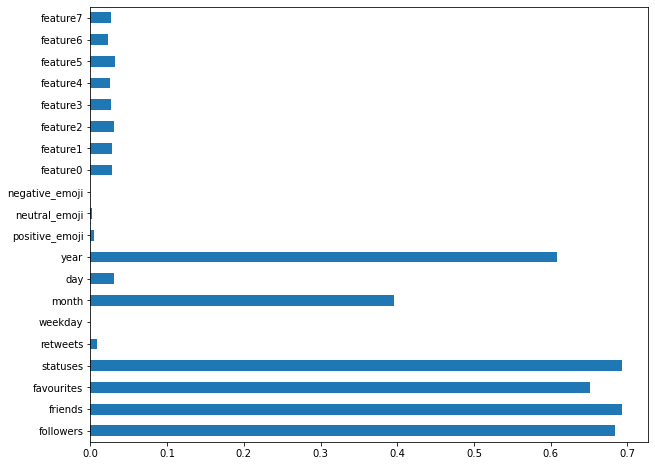

In [207]:
mutual = pd.Series(mutual_info[:20], index=X.columns[:20])
mutual.plot(kind='barh')

i'll create models with and without them

In [208]:
X_noemoji = X.drop(columns=['neutral_emoji','positive_emoji','retweets','negative_emoji'])
# Xmod_test = X_test.drop(columns=['neutral_emoji','positive_emoji','retweets','negative_emoji'])

seperate data without low info columns

## Algorithm Training and Model Building

In [219]:
from sklearn.model_selection import TimeSeriesSplit,StratifiedKFold
StratifiedKFold?

In [231]:
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import TimeSeriesSplit,StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,classification_report,recall_score



split = TimeSeriesSplit(n_splits=4)
strat_split = StratifiedKFold(n_splits=4)
randomF = RandomForestClassifier()
svc = SVC()
catB = CatBoostClassifier()
accuracy_train = []
accuracy_test = []
iterations = []
iter_ = 0
allow = 0
best_test_accuracy = float('inf')

for train_index,test_index in strat_split.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    iter_ += 1
    iterations.append(iter_)
    model = catB.fit(X_train,y_train)
    ypred_train= model.predict(X_train)
    ypred_test = model.predict(X_test)
    acc_train = accuracy_score(y_train,ypred_train)
    acc_test = accuracy_score(y_test,ypred_test)
    accuracy_train.append(acc_train)
    accuracy_test.append(acc_test)
    if acc_test < best_test_accuracy:
        best_test_accuracy = acc_test
    else:
        allow +=1 
        if allow >= 3:
            break
        
# print("X-train")
# print('--------')
# print(f'accuracy score decision tree train : {accuracy_score(y_train,ypredT_train)}')
# print(f'accuracy score decision tree test : {accuracy_score(y_test,ypredT_test)}')
# print('---------------------------------------------------------------------------')
# print(f'accuracy score random forest test : {accuracy_score(y_train,ypredF_train)}')
# print(f'accuracy score random forest test : {accuracy_score(y_test,ypredF_test)}')
# print()
# print('==========================================================================')
# print('X-mod')
# print('--------')
# print(f'accuracy score decision tree train : {accuracy_score(y_train,ypredT_mod)}')
# print(f'accuracy score decision tree test : {accuracy_score(y_test,ypredT_modtest)}')
# print('---------------------------------------------------------------------------')
# print(f'accuracy score random forest test : {accuracy_score(y_train,ypredF_mod)}')
# print(f'accuracy score random forest test : {accuracy_score(y_test,ypredF_modtest)}')

Learning rate set to 0.032741
0:	learn: 0.6022299	total: 33.7ms	remaining: 33.6s
1:	learn: 0.5141696	total: 65.7ms	remaining: 32.8s
2:	learn: 0.4302672	total: 96.3ms	remaining: 32s
3:	learn: 0.3823832	total: 125ms	remaining: 31.1s
4:	learn: 0.3362168	total: 156ms	remaining: 31s
5:	learn: 0.3018574	total: 185ms	remaining: 30.6s
6:	learn: 0.2620005	total: 221ms	remaining: 31.4s
7:	learn: 0.2282210	total: 254ms	remaining: 31.5s
8:	learn: 0.2071192	total: 282ms	remaining: 31.1s
9:	learn: 0.1775695	total: 311ms	remaining: 30.8s
10:	learn: 0.1502800	total: 340ms	remaining: 30.5s
11:	learn: 0.1302357	total: 370ms	remaining: 30.5s
12:	learn: 0.1108219	total: 401ms	remaining: 30.4s
13:	learn: 0.0971247	total: 438ms	remaining: 30.8s
14:	learn: 0.0834233	total: 474ms	remaining: 31.1s
15:	learn: 0.0717683	total: 505ms	remaining: 31s
16:	learn: 0.0616372	total: 534ms	remaining: 30.9s
17:	learn: 0.0532548	total: 565ms	remaining: 30.8s
18:	learn: 0.0462892	total: 595ms	remaining: 30.7s
19:	learn: 0.0

166:	learn: 0.0048080	total: 4.88s	remaining: 24.3s
167:	learn: 0.0048080	total: 4.89s	remaining: 24.2s
168:	learn: 0.0048080	total: 4.91s	remaining: 24.2s
169:	learn: 0.0048080	total: 4.94s	remaining: 24.1s
170:	learn: 0.0048080	total: 4.97s	remaining: 24.1s
171:	learn: 0.0048080	total: 4.99s	remaining: 24s
172:	learn: 0.0048080	total: 5.02s	remaining: 24s
173:	learn: 0.0048080	total: 5.05s	remaining: 24s
174:	learn: 0.0048080	total: 5.08s	remaining: 23.9s
175:	learn: 0.0048080	total: 5.09s	remaining: 23.8s
176:	learn: 0.0048080	total: 5.12s	remaining: 23.8s
177:	learn: 0.0048080	total: 5.15s	remaining: 23.8s
178:	learn: 0.0048080	total: 5.17s	remaining: 23.7s
179:	learn: 0.0048080	total: 5.2s	remaining: 23.7s
180:	learn: 0.0048080	total: 5.22s	remaining: 23.6s
181:	learn: 0.0048080	total: 5.25s	remaining: 23.6s
182:	learn: 0.0048080	total: 5.27s	remaining: 23.5s
183:	learn: 0.0048080	total: 5.3s	remaining: 23.5s
184:	learn: 0.0048080	total: 5.33s	remaining: 23.5s
185:	learn: 0.004807

331:	learn: 0.0048074	total: 9.19s	remaining: 18.5s
332:	learn: 0.0048074	total: 9.22s	remaining: 18.5s
333:	learn: 0.0048074	total: 9.25s	remaining: 18.4s
334:	learn: 0.0048074	total: 9.28s	remaining: 18.4s
335:	learn: 0.0048074	total: 9.3s	remaining: 18.4s
336:	learn: 0.0048074	total: 9.32s	remaining: 18.3s
337:	learn: 0.0048074	total: 9.34s	remaining: 18.3s
338:	learn: 0.0048074	total: 9.37s	remaining: 18.3s
339:	learn: 0.0048074	total: 9.4s	remaining: 18.2s
340:	learn: 0.0048074	total: 9.43s	remaining: 18.2s
341:	learn: 0.0048073	total: 9.46s	remaining: 18.2s
342:	learn: 0.0048073	total: 9.48s	remaining: 18.2s
343:	learn: 0.0048073	total: 9.51s	remaining: 18.1s
344:	learn: 0.0048073	total: 9.54s	remaining: 18.1s
345:	learn: 0.0048073	total: 9.56s	remaining: 18.1s
346:	learn: 0.0048073	total: 9.59s	remaining: 18s
347:	learn: 0.0048073	total: 9.62s	remaining: 18s
348:	learn: 0.0048073	total: 9.65s	remaining: 18s
349:	learn: 0.0048073	total: 9.67s	remaining: 18s
350:	learn: 0.0048073	

493:	learn: 0.0048068	total: 13.5s	remaining: 13.8s
494:	learn: 0.0048068	total: 13.5s	remaining: 13.8s
495:	learn: 0.0048068	total: 13.6s	remaining: 13.8s
496:	learn: 0.0048068	total: 13.6s	remaining: 13.7s
497:	learn: 0.0048068	total: 13.6s	remaining: 13.7s
498:	learn: 0.0048068	total: 13.6s	remaining: 13.7s
499:	learn: 0.0048068	total: 13.7s	remaining: 13.7s
500:	learn: 0.0048068	total: 13.7s	remaining: 13.6s
501:	learn: 0.0048068	total: 13.7s	remaining: 13.6s
502:	learn: 0.0048068	total: 13.7s	remaining: 13.6s
503:	learn: 0.0048068	total: 13.8s	remaining: 13.5s
504:	learn: 0.0048068	total: 13.8s	remaining: 13.5s
505:	learn: 0.0048067	total: 13.8s	remaining: 13.5s
506:	learn: 0.0048067	total: 13.8s	remaining: 13.5s
507:	learn: 0.0048067	total: 13.9s	remaining: 13.4s
508:	learn: 0.0048067	total: 13.9s	remaining: 13.4s
509:	learn: 0.0048067	total: 13.9s	remaining: 13.4s
510:	learn: 0.0048067	total: 13.9s	remaining: 13.3s
511:	learn: 0.0048067	total: 14s	remaining: 13.3s
512:	learn: 0.

657:	learn: 0.0048061	total: 17.8s	remaining: 9.26s
658:	learn: 0.0048061	total: 17.8s	remaining: 9.24s
659:	learn: 0.0048061	total: 17.9s	remaining: 9.21s
660:	learn: 0.0048061	total: 17.9s	remaining: 9.18s
661:	learn: 0.0048061	total: 17.9s	remaining: 9.15s
662:	learn: 0.0048061	total: 18s	remaining: 9.12s
663:	learn: 0.0048061	total: 18s	remaining: 9.1s
664:	learn: 0.0048061	total: 18s	remaining: 9.07s
665:	learn: 0.0048061	total: 18s	remaining: 9.04s
666:	learn: 0.0048061	total: 18.1s	remaining: 9.02s
667:	learn: 0.0048061	total: 18.1s	remaining: 8.99s
668:	learn: 0.0048061	total: 18.1s	remaining: 8.96s
669:	learn: 0.0048061	total: 18.1s	remaining: 8.93s
670:	learn: 0.0048061	total: 18.2s	remaining: 8.9s
671:	learn: 0.0048061	total: 18.2s	remaining: 8.88s
672:	learn: 0.0048061	total: 18.2s	remaining: 8.85s
673:	learn: 0.0048061	total: 18.2s	remaining: 8.82s
674:	learn: 0.0048061	total: 18.3s	remaining: 8.8s
675:	learn: 0.0048061	total: 18.3s	remaining: 8.77s
676:	learn: 0.0048061	t

818:	learn: 0.0048055	total: 22.1s	remaining: 4.87s
819:	learn: 0.0048055	total: 22.1s	remaining: 4.85s
820:	learn: 0.0048055	total: 22.1s	remaining: 4.82s
821:	learn: 0.0048055	total: 22.1s	remaining: 4.79s
822:	learn: 0.0048055	total: 22.2s	remaining: 4.76s
823:	learn: 0.0048055	total: 22.2s	remaining: 4.74s
824:	learn: 0.0048055	total: 22.2s	remaining: 4.71s
825:	learn: 0.0048055	total: 22.2s	remaining: 4.68s
826:	learn: 0.0048055	total: 22.3s	remaining: 4.66s
827:	learn: 0.0048055	total: 22.3s	remaining: 4.63s
828:	learn: 0.0048055	total: 22.3s	remaining: 4.6s
829:	learn: 0.0048055	total: 22.3s	remaining: 4.58s
830:	learn: 0.0048055	total: 22.4s	remaining: 4.55s
831:	learn: 0.0048055	total: 22.4s	remaining: 4.52s
832:	learn: 0.0048055	total: 22.4s	remaining: 4.49s
833:	learn: 0.0048055	total: 22.4s	remaining: 4.47s
834:	learn: 0.0048055	total: 22.5s	remaining: 4.44s
835:	learn: 0.0048055	total: 22.5s	remaining: 4.41s
836:	learn: 0.0048055	total: 22.5s	remaining: 4.38s
837:	learn: 0

984:	learn: 0.0048049	total: 26.4s	remaining: 402ms
985:	learn: 0.0048049	total: 26.4s	remaining: 376ms
986:	learn: 0.0048049	total: 26.5s	remaining: 349ms
987:	learn: 0.0048049	total: 26.5s	remaining: 322ms
988:	learn: 0.0048049	total: 26.5s	remaining: 295ms
989:	learn: 0.0048049	total: 26.6s	remaining: 268ms
990:	learn: 0.0048049	total: 26.6s	remaining: 241ms
991:	learn: 0.0048049	total: 26.6s	remaining: 215ms
992:	learn: 0.0048049	total: 26.6s	remaining: 188ms
993:	learn: 0.0048049	total: 26.7s	remaining: 161ms
994:	learn: 0.0048049	total: 26.7s	remaining: 134ms
995:	learn: 0.0048049	total: 26.7s	remaining: 107ms
996:	learn: 0.0048049	total: 26.7s	remaining: 80.4ms
997:	learn: 0.0048049	total: 26.8s	remaining: 53.6ms
998:	learn: 0.0048049	total: 26.8s	remaining: 26.8ms
999:	learn: 0.0048049	total: 26.8s	remaining: 0us
Learning rate set to 0.032742
0:	learn: 0.5859796	total: 33.9ms	remaining: 33.8s
1:	learn: 0.5230711	total: 63.7ms	remaining: 31.8s
2:	learn: 0.4373731	total: 92.8ms	r

146:	learn: 0.0017031	total: 4.23s	remaining: 24.5s
147:	learn: 0.0017031	total: 4.26s	remaining: 24.5s
148:	learn: 0.0017031	total: 4.29s	remaining: 24.5s
149:	learn: 0.0017031	total: 4.31s	remaining: 24.4s
150:	learn: 0.0017031	total: 4.34s	remaining: 24.4s
151:	learn: 0.0017031	total: 4.36s	remaining: 24.4s
152:	learn: 0.0017031	total: 4.39s	remaining: 24.3s
153:	learn: 0.0017031	total: 4.42s	remaining: 24.3s
154:	learn: 0.0017031	total: 4.45s	remaining: 24.3s
155:	learn: 0.0017031	total: 4.48s	remaining: 24.2s
156:	learn: 0.0017031	total: 4.51s	remaining: 24.2s
157:	learn: 0.0017031	total: 4.54s	remaining: 24.2s
158:	learn: 0.0017031	total: 4.56s	remaining: 24.1s
159:	learn: 0.0017031	total: 4.59s	remaining: 24.1s
160:	learn: 0.0017031	total: 4.62s	remaining: 24.1s
161:	learn: 0.0017031	total: 4.64s	remaining: 24s
162:	learn: 0.0017030	total: 4.67s	remaining: 24s
163:	learn: 0.0017031	total: 4.7s	remaining: 24s
164:	learn: 0.0017030	total: 4.73s	remaining: 23.9s
165:	learn: 0.00170

306:	learn: 0.0016321	total: 8.7s	remaining: 19.6s
307:	learn: 0.0016321	total: 8.72s	remaining: 19.6s
308:	learn: 0.0016321	total: 8.75s	remaining: 19.6s
309:	learn: 0.0016321	total: 8.78s	remaining: 19.5s
310:	learn: 0.0016321	total: 8.81s	remaining: 19.5s
311:	learn: 0.0016321	total: 8.83s	remaining: 19.5s
312:	learn: 0.0016321	total: 8.86s	remaining: 19.4s
313:	learn: 0.0016321	total: 8.89s	remaining: 19.4s
314:	learn: 0.0016321	total: 8.92s	remaining: 19.4s
315:	learn: 0.0016321	total: 8.95s	remaining: 19.4s
316:	learn: 0.0016321	total: 8.97s	remaining: 19.3s
317:	learn: 0.0016321	total: 9s	remaining: 19.3s
318:	learn: 0.0016321	total: 9.03s	remaining: 19.3s
319:	learn: 0.0016321	total: 9.05s	remaining: 19.2s
320:	learn: 0.0016321	total: 9.09s	remaining: 19.2s
321:	learn: 0.0016321	total: 9.11s	remaining: 19.2s
322:	learn: 0.0016321	total: 9.14s	remaining: 19.2s
323:	learn: 0.0016321	total: 9.17s	remaining: 19.1s
324:	learn: 0.0016321	total: 9.2s	remaining: 19.1s
325:	learn: 0.001

466:	learn: 0.0016319	total: 13.1s	remaining: 15s
467:	learn: 0.0016319	total: 13.2s	remaining: 15s
468:	learn: 0.0016319	total: 13.2s	remaining: 14.9s
469:	learn: 0.0016319	total: 13.2s	remaining: 14.9s
470:	learn: 0.0016319	total: 13.2s	remaining: 14.9s
471:	learn: 0.0016319	total: 13.3s	remaining: 14.8s
472:	learn: 0.0016319	total: 13.3s	remaining: 14.8s
473:	learn: 0.0016319	total: 13.3s	remaining: 14.8s
474:	learn: 0.0016319	total: 13.3s	remaining: 14.8s
475:	learn: 0.0016319	total: 13.4s	remaining: 14.7s
476:	learn: 0.0016319	total: 13.4s	remaining: 14.7s
477:	learn: 0.0016319	total: 13.4s	remaining: 14.7s
478:	learn: 0.0016319	total: 13.5s	remaining: 14.6s
479:	learn: 0.0016319	total: 13.5s	remaining: 14.6s
480:	learn: 0.0016319	total: 13.5s	remaining: 14.6s
481:	learn: 0.0016319	total: 13.5s	remaining: 14.5s
482:	learn: 0.0016319	total: 13.6s	remaining: 14.5s
483:	learn: 0.0016319	total: 13.6s	remaining: 14.5s
484:	learn: 0.0016319	total: 13.6s	remaining: 14.5s
485:	learn: 0.00

632:	learn: 0.0016318	total: 17.7s	remaining: 10.3s
633:	learn: 0.0016318	total: 17.7s	remaining: 10.2s
634:	learn: 0.0016318	total: 17.8s	remaining: 10.2s
635:	learn: 0.0016318	total: 17.8s	remaining: 10.2s
636:	learn: 0.0016318	total: 17.8s	remaining: 10.2s
637:	learn: 0.0016318	total: 17.8s	remaining: 10.1s
638:	learn: 0.0016318	total: 17.9s	remaining: 10.1s
639:	learn: 0.0016318	total: 17.9s	remaining: 10.1s
640:	learn: 0.0016317	total: 17.9s	remaining: 10s
641:	learn: 0.0016317	total: 18s	remaining: 10s
642:	learn: 0.0016318	total: 18s	remaining: 9.99s
643:	learn: 0.0016318	total: 18s	remaining: 9.96s
644:	learn: 0.0016318	total: 18s	remaining: 9.93s
645:	learn: 0.0016317	total: 18.1s	remaining: 9.9s
646:	learn: 0.0016318	total: 18.1s	remaining: 9.87s
647:	learn: 0.0016317	total: 18.1s	remaining: 9.85s
648:	learn: 0.0016318	total: 18.2s	remaining: 9.82s
649:	learn: 0.0016317	total: 18.2s	remaining: 9.79s
650:	learn: 0.0016317	total: 18.2s	remaining: 9.76s
651:	learn: 0.0016317	tot

792:	learn: 0.0016316	total: 22.1s	remaining: 5.78s
793:	learn: 0.0016316	total: 22.2s	remaining: 5.75s
794:	learn: 0.0016316	total: 22.2s	remaining: 5.72s
795:	learn: 0.0016316	total: 22.2s	remaining: 5.69s
796:	learn: 0.0016316	total: 22.2s	remaining: 5.67s
797:	learn: 0.0016316	total: 22.3s	remaining: 5.64s
798:	learn: 0.0016316	total: 22.3s	remaining: 5.61s
799:	learn: 0.0016316	total: 22.3s	remaining: 5.58s
800:	learn: 0.0016316	total: 22.4s	remaining: 5.55s
801:	learn: 0.0016316	total: 22.4s	remaining: 5.53s
802:	learn: 0.0016316	total: 22.4s	remaining: 5.5s
803:	learn: 0.0016316	total: 22.4s	remaining: 5.47s
804:	learn: 0.0016316	total: 22.5s	remaining: 5.44s
805:	learn: 0.0016316	total: 22.5s	remaining: 5.41s
806:	learn: 0.0016316	total: 22.5s	remaining: 5.38s
807:	learn: 0.0016316	total: 22.5s	remaining: 5.36s
808:	learn: 0.0016316	total: 22.6s	remaining: 5.33s
809:	learn: 0.0016316	total: 22.6s	remaining: 5.3s
810:	learn: 0.0016316	total: 22.6s	remaining: 5.27s
811:	learn: 0.

951:	learn: 0.0016314	total: 26.6s	remaining: 1.34s
952:	learn: 0.0016314	total: 26.6s	remaining: 1.31s
953:	learn: 0.0016314	total: 26.6s	remaining: 1.28s
954:	learn: 0.0016314	total: 26.7s	remaining: 1.25s
955:	learn: 0.0016314	total: 26.7s	remaining: 1.23s
956:	learn: 0.0016314	total: 26.7s	remaining: 1.2s
957:	learn: 0.0016314	total: 26.7s	remaining: 1.17s
958:	learn: 0.0016314	total: 26.8s	remaining: 1.14s
959:	learn: 0.0016314	total: 26.8s	remaining: 1.12s
960:	learn: 0.0016314	total: 26.8s	remaining: 1.09s
961:	learn: 0.0016314	total: 26.8s	remaining: 1.06s
962:	learn: 0.0016314	total: 26.9s	remaining: 1.03s
963:	learn: 0.0016314	total: 26.9s	remaining: 1s
964:	learn: 0.0016314	total: 26.9s	remaining: 977ms
965:	learn: 0.0016314	total: 27s	remaining: 949ms
966:	learn: 0.0016314	total: 27s	remaining: 921ms
967:	learn: 0.0016314	total: 27s	remaining: 894ms
968:	learn: 0.0016314	total: 27.1s	remaining: 866ms
969:	learn: 0.0016314	total: 27.1s	remaining: 838ms
970:	learn: 0.0016314	

118:	learn: 0.0034194	total: 3.43s	remaining: 25.4s
119:	learn: 0.0034194	total: 3.46s	remaining: 25.4s
120:	learn: 0.0034194	total: 3.49s	remaining: 25.3s
121:	learn: 0.0034194	total: 3.51s	remaining: 25.3s
122:	learn: 0.0034194	total: 3.54s	remaining: 25.3s
123:	learn: 0.0034194	total: 3.56s	remaining: 25.1s
124:	learn: 0.0034194	total: 3.58s	remaining: 25.1s
125:	learn: 0.0034194	total: 3.62s	remaining: 25.1s
126:	learn: 0.0034194	total: 3.65s	remaining: 25.1s
127:	learn: 0.0034194	total: 3.67s	remaining: 25s
128:	learn: 0.0034194	total: 3.7s	remaining: 25s
129:	learn: 0.0034194	total: 3.73s	remaining: 25s
130:	learn: 0.0034194	total: 3.76s	remaining: 24.9s
131:	learn: 0.0034194	total: 3.78s	remaining: 24.9s
132:	learn: 0.0034194	total: 3.81s	remaining: 24.8s
133:	learn: 0.0034194	total: 3.83s	remaining: 24.8s
134:	learn: 0.0034194	total: 3.85s	remaining: 24.7s
135:	learn: 0.0034194	total: 3.88s	remaining: 24.6s
136:	learn: 0.0034194	total: 3.9s	remaining: 24.6s
137:	learn: 0.003419

279:	learn: 0.0031571	total: 7.77s	remaining: 20s
280:	learn: 0.0031571	total: 7.8s	remaining: 20s
281:	learn: 0.0031571	total: 7.83s	remaining: 19.9s
282:	learn: 0.0031571	total: 7.86s	remaining: 19.9s
283:	learn: 0.0031571	total: 7.88s	remaining: 19.9s
284:	learn: 0.0031571	total: 7.91s	remaining: 19.8s
285:	learn: 0.0031571	total: 7.94s	remaining: 19.8s
286:	learn: 0.0031571	total: 7.96s	remaining: 19.8s
287:	learn: 0.0031571	total: 7.99s	remaining: 19.8s
288:	learn: 0.0031571	total: 8.02s	remaining: 19.7s
289:	learn: 0.0031571	total: 8.05s	remaining: 19.7s
290:	learn: 0.0031571	total: 8.08s	remaining: 19.7s
291:	learn: 0.0031571	total: 8.11s	remaining: 19.7s
292:	learn: 0.0031571	total: 8.13s	remaining: 19.6s
293:	learn: 0.0031571	total: 8.16s	remaining: 19.6s
294:	learn: 0.0031571	total: 8.18s	remaining: 19.6s
295:	learn: 0.0031571	total: 8.21s	remaining: 19.5s
296:	learn: 0.0031571	total: 8.24s	remaining: 19.5s
297:	learn: 0.0031571	total: 8.26s	remaining: 19.5s
298:	learn: 0.003

439:	learn: 0.0029451	total: 11.9s	remaining: 15.2s
440:	learn: 0.0029451	total: 12s	remaining: 15.2s
441:	learn: 0.0029451	total: 12s	remaining: 15.1s
442:	learn: 0.0029451	total: 12s	remaining: 15.1s
443:	learn: 0.0029451	total: 12s	remaining: 15.1s
444:	learn: 0.0029451	total: 12s	remaining: 15s
445:	learn: 0.0029451	total: 12.1s	remaining: 15s
446:	learn: 0.0029451	total: 12.1s	remaining: 15s
447:	learn: 0.0029451	total: 12.1s	remaining: 14.9s
448:	learn: 0.0029451	total: 12.2s	remaining: 14.9s
449:	learn: 0.0029451	total: 12.2s	remaining: 14.9s
450:	learn: 0.0029451	total: 12.2s	remaining: 14.9s
451:	learn: 0.0029451	total: 12.2s	remaining: 14.8s
452:	learn: 0.0029451	total: 12.2s	remaining: 14.8s
453:	learn: 0.0029451	total: 12.3s	remaining: 14.7s
454:	learn: 0.0029451	total: 12.3s	remaining: 14.7s
455:	learn: 0.0029451	total: 12.3s	remaining: 14.7s
456:	learn: 0.0029451	total: 12.3s	remaining: 14.6s
457:	learn: 0.0029451	total: 12.3s	remaining: 14.6s
458:	learn: 0.0029451	total:

605:	learn: 0.0029448	total: 15.9s	remaining: 10.3s
606:	learn: 0.0029448	total: 15.9s	remaining: 10.3s
607:	learn: 0.0029448	total: 16s	remaining: 10.3s
608:	learn: 0.0029448	total: 16s	remaining: 10.3s
609:	learn: 0.0029448	total: 16s	remaining: 10.2s
610:	learn: 0.0029448	total: 16s	remaining: 10.2s
611:	learn: 0.0029448	total: 16s	remaining: 10.2s
612:	learn: 0.0029448	total: 16.1s	remaining: 10.1s
613:	learn: 0.0029448	total: 16.1s	remaining: 10.1s
614:	learn: 0.0029448	total: 16.1s	remaining: 10.1s
615:	learn: 0.0029448	total: 16.1s	remaining: 10.1s
616:	learn: 0.0029448	total: 16.2s	remaining: 10s
617:	learn: 0.0029448	total: 16.2s	remaining: 10s
618:	learn: 0.0029448	total: 16.2s	remaining: 9.98s
619:	learn: 0.0029448	total: 16.2s	remaining: 9.95s
620:	learn: 0.0029448	total: 16.3s	remaining: 9.92s
621:	learn: 0.0029448	total: 16.3s	remaining: 9.89s
622:	learn: 0.0029448	total: 16.3s	remaining: 9.86s
623:	learn: 0.0029448	total: 16.3s	remaining: 9.84s
624:	learn: 0.0029448	tota

766:	learn: 0.0029445	total: 19.8s	remaining: 6.02s
767:	learn: 0.0029445	total: 19.8s	remaining: 5.99s
768:	learn: 0.0029445	total: 19.9s	remaining: 5.96s
769:	learn: 0.0029445	total: 19.9s	remaining: 5.94s
770:	learn: 0.0029444	total: 19.9s	remaining: 5.91s
771:	learn: 0.0029444	total: 19.9s	remaining: 5.89s
772:	learn: 0.0029444	total: 20s	remaining: 5.86s
773:	learn: 0.0029444	total: 20s	remaining: 5.83s
774:	learn: 0.0029444	total: 20s	remaining: 5.81s
775:	learn: 0.0029444	total: 20s	remaining: 5.78s
776:	learn: 0.0029444	total: 20s	remaining: 5.75s
777:	learn: 0.0029444	total: 20.1s	remaining: 5.72s
778:	learn: 0.0029444	total: 20.1s	remaining: 5.7s
779:	learn: 0.0029444	total: 20.1s	remaining: 5.67s
780:	learn: 0.0029444	total: 20.1s	remaining: 5.65s
781:	learn: 0.0029444	total: 20.2s	remaining: 5.62s
782:	learn: 0.0029444	total: 20.2s	remaining: 5.6s
783:	learn: 0.0029444	total: 20.2s	remaining: 5.57s
784:	learn: 0.0029444	total: 20.2s	remaining: 5.55s
785:	learn: 0.0029444	to

929:	learn: 0.0029441	total: 24s	remaining: 1.8s
930:	learn: 0.0029441	total: 24s	remaining: 1.78s
931:	learn: 0.0029441	total: 24s	remaining: 1.75s
932:	learn: 0.0029441	total: 24s	remaining: 1.73s
933:	learn: 0.0029441	total: 24.1s	remaining: 1.7s
934:	learn: 0.0029441	total: 24.1s	remaining: 1.68s
935:	learn: 0.0029441	total: 24.1s	remaining: 1.65s
936:	learn: 0.0029441	total: 24.1s	remaining: 1.62s
937:	learn: 0.0029441	total: 24.2s	remaining: 1.6s
938:	learn: 0.0029441	total: 24.2s	remaining: 1.57s
939:	learn: 0.0029441	total: 24.2s	remaining: 1.54s
940:	learn: 0.0029440	total: 24.2s	remaining: 1.52s
941:	learn: 0.0029441	total: 24.3s	remaining: 1.49s
942:	learn: 0.0029441	total: 24.3s	remaining: 1.47s
943:	learn: 0.0029441	total: 24.3s	remaining: 1.44s
944:	learn: 0.0029441	total: 24.3s	remaining: 1.42s
945:	learn: 0.0029440	total: 24.4s	remaining: 1.39s
946:	learn: 0.0029440	total: 24.4s	remaining: 1.36s
947:	learn: 0.0029440	total: 24.4s	remaining: 1.34s
948:	learn: 0.0029440	t

90:	learn: 0.0005407	total: 2.83s	remaining: 28.3s
91:	learn: 0.0005217	total: 2.87s	remaining: 28.3s
92:	learn: 0.0005217	total: 2.89s	remaining: 28.2s
93:	learn: 0.0005217	total: 2.92s	remaining: 28.2s
94:	learn: 0.0005217	total: 2.95s	remaining: 28.1s
95:	learn: 0.0005057	total: 2.98s	remaining: 28.1s
96:	learn: 0.0004903	total: 3.01s	remaining: 28s
97:	learn: 0.0004903	total: 3.05s	remaining: 28.1s
98:	learn: 0.0004903	total: 3.08s	remaining: 28s
99:	learn: 0.0004903	total: 3.12s	remaining: 28s
100:	learn: 0.0004746	total: 3.15s	remaining: 28.1s
101:	learn: 0.0004746	total: 3.18s	remaining: 28s
102:	learn: 0.0004746	total: 3.21s	remaining: 27.9s
103:	learn: 0.0004746	total: 3.23s	remaining: 27.9s
104:	learn: 0.0004746	total: 3.27s	remaining: 27.9s
105:	learn: 0.0004746	total: 3.29s	remaining: 27.8s
106:	learn: 0.0004599	total: 3.33s	remaining: 27.8s
107:	learn: 0.0004467	total: 3.36s	remaining: 27.7s
108:	learn: 0.0004467	total: 3.38s	remaining: 27.6s
109:	learn: 0.0004467	total: 3

256:	learn: 0.0004107	total: 7.55s	remaining: 21.8s
257:	learn: 0.0004107	total: 7.58s	remaining: 21.8s
258:	learn: 0.0004107	total: 7.61s	remaining: 21.8s
259:	learn: 0.0004107	total: 7.63s	remaining: 21.7s
260:	learn: 0.0004107	total: 7.66s	remaining: 21.7s
261:	learn: 0.0004107	total: 7.69s	remaining: 21.7s
262:	learn: 0.0004107	total: 7.71s	remaining: 21.6s
263:	learn: 0.0004107	total: 7.74s	remaining: 21.6s
264:	learn: 0.0004107	total: 7.77s	remaining: 21.6s
265:	learn: 0.0004107	total: 7.8s	remaining: 21.5s
266:	learn: 0.0004107	total: 7.83s	remaining: 21.5s
267:	learn: 0.0004107	total: 7.86s	remaining: 21.5s
268:	learn: 0.0004107	total: 7.88s	remaining: 21.4s
269:	learn: 0.0004107	total: 7.91s	remaining: 21.4s
270:	learn: 0.0004107	total: 7.94s	remaining: 21.4s
271:	learn: 0.0004107	total: 7.96s	remaining: 21.3s
272:	learn: 0.0004107	total: 8s	remaining: 21.3s
273:	learn: 0.0004107	total: 8.03s	remaining: 21.3s
274:	learn: 0.0004107	total: 8.05s	remaining: 21.2s
275:	learn: 0.00

416:	learn: 0.0003995	total: 12.1s	remaining: 16.9s
417:	learn: 0.0003995	total: 12.1s	remaining: 16.9s
418:	learn: 0.0003995	total: 12.1s	remaining: 16.8s
419:	learn: 0.0003995	total: 12.2s	remaining: 16.8s
420:	learn: 0.0003995	total: 12.2s	remaining: 16.8s
421:	learn: 0.0003995	total: 12.2s	remaining: 16.7s
422:	learn: 0.0003995	total: 12.3s	remaining: 16.7s
423:	learn: 0.0003995	total: 12.3s	remaining: 16.7s
424:	learn: 0.0003995	total: 12.3s	remaining: 16.7s
425:	learn: 0.0003995	total: 12.3s	remaining: 16.6s
426:	learn: 0.0003995	total: 12.4s	remaining: 16.6s
427:	learn: 0.0003995	total: 12.4s	remaining: 16.6s
428:	learn: 0.0003995	total: 12.4s	remaining: 16.5s
429:	learn: 0.0003995	total: 12.5s	remaining: 16.5s
430:	learn: 0.0003995	total: 12.5s	remaining: 16.5s
431:	learn: 0.0003995	total: 12.5s	remaining: 16.4s
432:	learn: 0.0003995	total: 12.5s	remaining: 16.4s
433:	learn: 0.0003995	total: 12.6s	remaining: 16.4s
434:	learn: 0.0003995	total: 12.6s	remaining: 16.4s
435:	learn: 

576:	learn: 0.0003993	total: 16.6s	remaining: 12.1s
577:	learn: 0.0003993	total: 16.6s	remaining: 12.1s
578:	learn: 0.0003993	total: 16.6s	remaining: 12.1s
579:	learn: 0.0003993	total: 16.7s	remaining: 12.1s
580:	learn: 0.0003993	total: 16.7s	remaining: 12s
581:	learn: 0.0003993	total: 16.7s	remaining: 12s
582:	learn: 0.0003993	total: 16.7s	remaining: 12s
583:	learn: 0.0003993	total: 16.8s	remaining: 11.9s
584:	learn: 0.0003993	total: 16.8s	remaining: 11.9s
585:	learn: 0.0003993	total: 16.8s	remaining: 11.9s
586:	learn: 0.0003993	total: 16.8s	remaining: 11.9s
587:	learn: 0.0003993	total: 16.9s	remaining: 11.8s
588:	learn: 0.0003993	total: 16.9s	remaining: 11.8s
589:	learn: 0.0003993	total: 16.9s	remaining: 11.8s
590:	learn: 0.0003993	total: 17s	remaining: 11.7s
591:	learn: 0.0003993	total: 17s	remaining: 11.7s
592:	learn: 0.0003993	total: 17s	remaining: 11.7s
593:	learn: 0.0003993	total: 17s	remaining: 11.7s
594:	learn: 0.0003993	total: 17.1s	remaining: 11.6s
595:	learn: 0.0003993	tota

735:	learn: 0.0003992	total: 21s	remaining: 7.54s
736:	learn: 0.0003992	total: 21s	remaining: 7.51s
737:	learn: 0.0003992	total: 21.1s	remaining: 7.48s
738:	learn: 0.0003992	total: 21.1s	remaining: 7.45s
739:	learn: 0.0003992	total: 21.1s	remaining: 7.42s
740:	learn: 0.0003992	total: 21.1s	remaining: 7.39s
741:	learn: 0.0003992	total: 21.2s	remaining: 7.36s
742:	learn: 0.0003992	total: 21.2s	remaining: 7.33s
743:	learn: 0.0003992	total: 21.2s	remaining: 7.3s
744:	learn: 0.0003992	total: 21.3s	remaining: 7.28s
745:	learn: 0.0003992	total: 21.3s	remaining: 7.25s
746:	learn: 0.0003992	total: 21.3s	remaining: 7.22s
747:	learn: 0.0003992	total: 21.3s	remaining: 7.19s
748:	learn: 0.0003992	total: 21.4s	remaining: 7.16s
749:	learn: 0.0003992	total: 21.4s	remaining: 7.13s
750:	learn: 0.0003992	total: 21.4s	remaining: 7.1s
751:	learn: 0.0003992	total: 21.5s	remaining: 7.08s
752:	learn: 0.0003992	total: 21.5s	remaining: 7.05s
753:	learn: 0.0003992	total: 21.5s	remaining: 7.02s
754:	learn: 0.0003

894:	learn: 0.0003990	total: 25.4s	remaining: 2.98s
895:	learn: 0.0003990	total: 25.5s	remaining: 2.96s
896:	learn: 0.0003990	total: 25.5s	remaining: 2.93s
897:	learn: 0.0003990	total: 25.5s	remaining: 2.9s
898:	learn: 0.0003990	total: 25.6s	remaining: 2.87s
899:	learn: 0.0003990	total: 25.6s	remaining: 2.84s
900:	learn: 0.0003990	total: 25.6s	remaining: 2.81s
901:	learn: 0.0003990	total: 25.6s	remaining: 2.79s
902:	learn: 0.0003990	total: 25.7s	remaining: 2.76s
903:	learn: 0.0003990	total: 25.7s	remaining: 2.73s
904:	learn: 0.0003990	total: 25.7s	remaining: 2.7s
905:	learn: 0.0003990	total: 25.8s	remaining: 2.67s
906:	learn: 0.0003990	total: 25.8s	remaining: 2.64s
907:	learn: 0.0003990	total: 25.8s	remaining: 2.61s
908:	learn: 0.0003990	total: 25.8s	remaining: 2.59s
909:	learn: 0.0003990	total: 25.9s	remaining: 2.56s
910:	learn: 0.0003990	total: 25.9s	remaining: 2.53s
911:	learn: 0.0003990	total: 25.9s	remaining: 2.5s
912:	learn: 0.0003990	total: 25.9s	remaining: 2.47s
913:	learn: 0.0

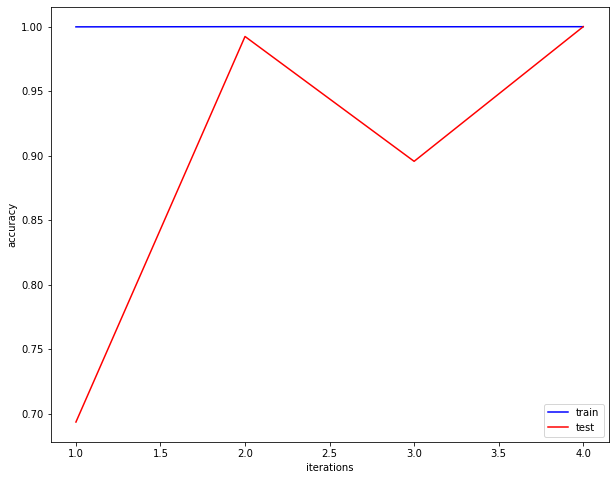

In [232]:
plt.plot(iterations,accuracy_train,color='blue',label='train')
plt.plot(iterations,accuracy_test,color='red',label='test')
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#### The rest cells are not part of the latest edit of this notebook, hence running them will result in error, i left them there for purpose of future insights 

In [21]:
print("X-train")
print('--------')
print(f'f1 score decision tree train : {f1_score(y_train,ypredT_train)}')
print(f'f1 score score decision tree test : {f1_score(y_test,ypredT_test)}')
print('---------------------------------------------------------------------------')
print(f'f1 score score random forest test : {f1_score(y_train,ypredF_train)}')
print(f'f1 score score random forest test : {f1_score(y_test,ypredF_test)}')
print()
print('==========================================================================')
print('X-mod')
print('--------')
print(f'f1 score score decision tree train : {f1_score(y_train,ypredT_mod)}')
print(f'f1 score score decision tree test : {f1_score(y_test,ypredT_modtest)}')
print('---------------------------------------------------------------------------')
print(f'f1 score score random forest test : {f1_score(y_train,ypredF_mod)}')
print(f'f1 score score random forest test : {f1_score(y_test,ypredF_modtest)}')

X-train
--------
f1 score decision tree train : 1.0
f1 score score decision tree test : 1.0
---------------------------------------------------------------------------
f1 score score random forest test : 1.0
f1 score score random forest test : 1.0

X-mod
--------
f1 score score decision tree train : 1.0
f1 score score decision tree test : 1.0
---------------------------------------------------------------------------
f1 score score random forest test : 1.0
f1 score score random forest test : 1.0


In [27]:
decisionT.fit(tfidf_train,ytfidf_train)
randomF.fit(tfidf_train,ytfidf_train)
ypredT_tfdiftest = decisionT.predict(tfidf_test)
ypredF_tfidftest = randomF.predict(tfidf_test)

# print('Tfidf')
# print('--------')
# print(f'accuracy score decision tree train : {accuracy_score(ytfidf_train,ypredT_tfidf)}')
# print(f'accuracy score decision tree test : {accuracy_score(ytfidf_test,ypredT_tfidftest)}')
# print('---------------------------------------------------------------------------')
# print(f'accuracy score random forest test : {accuracy_score(ytfidf_train,ypredF_tfidf)}')
# print(f'accuracy score random forest test : {accuracy_score(ytfidf_test,ypredF_tfidftest)}')

In [26]:
ypredT_tfidf = decisionT.predict(tfidf_train)
ypredF_tfidf = randomF.predict(tfidf_train)
ypredT_tfidftest = decisionT.predict(tfidf_test)
ypredF_tfidftest = randomF.predict(tfidf_test)

print('Tfidf')
print('--------')
print(f'accuracy score decision tree train : {accuracy_score(ytfidf_train,ypredT_tfidf)}')
print(f'accuracy score decision tree test : {accuracy_score(ytfidf_test,ypredT_tfidftest)}')
print('---------------------------------------------------------------------------')
print(f'accuracy score random forest test : {accuracy_score(ytfidf_train,ypredF_tfidf)}')
print(f'accuracy score random forest test : {accuracy_score(ytfidf_test,ypredF_tfidftest)}')

Tfidf
--------
accuracy score decision tree train : 0.9893431327514929
accuracy score decision tree test : 0.8056576047024246
---------------------------------------------------------------------------
accuracy score random forest test : 0.9893431327514929
accuracy score random forest test : 0.8137398971344599


In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,classification_report,recall_score



print("X-train")
print('--------')
print(f'accuracy score decision tree train : {accuracy_score(y_train,ypredT_train)}')
print(f'accuracy score decision tree test : {accuracy_score(y_test,ypredT_test)}')
print('---------------------------------------------------------------------------')
print(f'accuracy score random forest test : {accuracy_score(y_tain,ypredF_train)}')
print(f'accuracy score random forest test : {accuracy_score(y_test,ypredF_test)}')
print()
print('==========================================================================')
print('X-mod')
print('--------')
print(f'accuracy score decision tree train : {accuracy_score(y_train,ypredT_mod)}')
print(f'accuracy score decision tree test : {accuracy_score(y_test,ypredT_modtest)}')
print('---------------------------------------------------------------------------')
print(f'accuracy score random forest test : {accuracy_score(y_tain,ypredF_mod)}')
print(f'accuracy score random forest test : {accuracy_score(y_test,ypredF_modtest)}')
print()
print('==========================================================================')
print('Tfidf')
print('--------')
print(f'accuracy score decision tree train : {accuracy_score(y_train,ypredT_tfidf)}')
print(f'accuracy score decision tree test : {accuracy_score(y_test,ypredT_tfidftest)}')
print('---------------------------------------------------------------------------')
print(f'accuracy score random forest test : {accuracy_score(y_tain,ypredF_tfidf)}')
print(f'accuracy score random forest test : {accuracy_score(y_test,ypredF_tfidftest)}')

## Hyperparameter Tuning

In [29]:
params = {'n_estimators' : [100,150,200,300,350],'max_depth':[5,8,10,15,20,25,30,50],
          'min_samples_split':[2,5,8,10,15,20,30,35],'min_samples_leaf':[1,4,6,8,10,13,15,18]}

In [30]:
from sklearn.model_selection import RandomizedSearchCV

randomCV = RandomizedSearchCV(estimator=randomF,param_distributions=params,n_jobs=-1,verbose=True)
randomCV.fit(tfidf_train,ytfidf_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 10, 15, 20, 25, 30,
                                                      50],
                                        'min_samples_leaf': [1, 4, 6, 8, 10, 13,
                                                             15, 18],
                                        'min_samples_split': [2, 5, 8, 10, 15,
                                                              20, 30, 35],
                                        'n_estimators': [100, 150, 200, 300,
                                                         350]},
                   verbose=True)

In [33]:
randomCV.best_params_

{'n_estimators': 350,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 20}

In [39]:
params_grid = {'n_estimators' : [200,300,310,325,350],'max_depth':[15,20,25,30]}

In [57]:
from sklearn.model_selection import GridSearchCV

gridCV = GridSearchCV(estimator=randomF,param_grid=params_grid,n_jobs=-1,verbose=True,)
gridCV.fit(tfidf_train,ytfidf_train)